## _**Pseudomonas boanensis**_ **DB1** WGS analysis
### Author: Shawn Higdon
### Date: January 27, 2022 - Feb 18, 2022

> This notebook documents WGS comparative analysis between _Pseudomonas boanensis_ strain DB1 and other closely related isolate WGS sequences available in the [Genome Taxonomy Database](https://gtdb.ecogenomic.org) and/or __NCBI GenBank__.


### Analysis Overview

> [1. MinHash comparison of WGS Isolate Genomes from __TYGS dDDH__ Analysis (Re-do ANI analysis)](#1.-Reference-Genome-Comparative-Analysis-with-MinHash)
>
> [2. _**rpoD**_ phylogenetic analysis](#2.-rpoD-phylogenetic-analysis)
>
> [3. _**P. boanensis**_ isolate purity analysis](#3.-Pseudomonas-boanensis-isolate-purity-analysis)
>
> [4. _**tetra**_ nucleotide frequency analysis](#4.-Tetranucleotide-frequency-analysis)
>


### Tools Overview

 1. `ncbi-genome-download`

 2. `sourmash`

 3. `NCBI e-utilities`

 4. `NCBI datasets`

 5. `MUSCLE`

 6. `RAxML`

 7. `CheckM`

 8. `pyani`

 9. `R Packages`
     * `ggtree`
     * `ComplexHeatmaps`
     * `tidyverse`


### TYGS WGS Strains

> _Azomonas agilis_ DSM 375 included as an outgroup to root phylogenetic tree.

| RefSeq Accession | Strain                          |
|------------------|---------------------------------|
| GCF_018704125.1  | P. boanensis DB1                |
| GCF_007830255.1  | A. agilis DSM 375               |
| GCF_900099645.1  | P. peli DSM 17833               |
| GCF_000467105.1  | P. alcaligenes NBRC 14159       |
| GCF_900104265.1  | P. guguanensis JCM 18416        |
| GCF_900115695.1  | P. toyotomiensis JCM 15604      |
| GCF_003052605.1  | P. indoloxydans JCM 14246       |
| GCF_002091775.1  | P. pseudoalcaligenes NBRC 14167 |
| GCF_000818015.1  | P. balearica DSM 6083           |
| GCF_900109175.1  | P. linyingensis LMG 25967       |
| GCF_900104805.1  | P. oryzae KCTC 33247            |
| GCF_900103845.1  | P. jinjuensis JCM 21621         |
| GCF_002091755.1  | P. nitroreducens NBRC 12694     |
| GCF_010994165.1  | P. nitritireducens WZBFD3-5A2   |
| GCF_900111835.1  | P. otitidis DSM 17224           |
| GCF_002355475.1  | P. furukawaii KF707             |
| GCF_000423545.1  | P. resinovorans DSM 21078       |
| GCF_008807375.1  | P. lalkuanensis MCC 3792        |

In [10]:
%%bash

pwd

mkdir -p sourmash/{tygs_strains,all_refseq_reps}

tree -L 2

echo -e "\n"

ls . && echo -e "\n"

/ceph/projects/pboanensis_smh
.
├── p-boanensis-sourmash-analysis.ipynb
├── sourmash
│   ├── all_refseq_reps
│   └── tygs_strains
└── tygs-dddh-pseudomonas-wgs-list.txt

3 directories, 2 files


p-boanensis-sourmash-analysis.ipynb
sourmash
tygs-dddh-pseudomonas-wgs-list.txt




### 1. Reference Genome Comparative Analysis with MinHash

### Download references

> Use `ncbi-genome-download` the 18 genome assemblies from NCBI Refseq Database.

In [13]:
%%bash

# create input file with refseq accessions
cat tygs-dddh-pseudomonas-wgs-list.txt | cut -f 1 > sourmash/tygs_strains/tygs-wgs-refseq-acc.txt

In [16]:
%%bash

cd sourmash/tygs_strains

ncbi-genome-download \
    -s refseq \
    -F fasta \
    -A tygs-wgs-refseq-acc.txt \
    -o ref_asm \
    --flat-output \
    -p 6 \
    -v \
    bacteria
    
ls ref_asm

GCF_000423545.1_ASM42354v1_genomic.fna.gz
GCF_000467105.1_ASM46710v1_genomic.fna.gz
GCF_000818015.1_ASM81801v1_genomic.fna.gz
GCF_002091755.1_ASM209175v1_genomic.fna.gz
GCF_002091775.1_ASM209177v1_genomic.fna.gz
GCF_002355475.1_ASM235547v1_genomic.fna.gz
GCF_003052605.1_ASM305260v1_genomic.fna.gz
GCF_007830255.1_ASM783025v1_genomic.fna.gz
GCF_008807375.1_ASM880737v1_genomic.fna.gz
GCF_010994165.1_ASM1099416v1_genomic.fna.gz
GCF_018704125.1_ASM1870412v1_genomic.fna.gz
GCF_900099645.1_IMG-taxon_2671180067_annotated_assembly_genomic.fna.gz
GCF_900103845.1_IMG-taxon_2663762768_annotated_assembly_genomic.fna.gz
GCF_900104265.1_IMG-taxon_2663762796_annotated_assembly_genomic.fna.gz
GCF_900104805.1_IMG-taxon_2667527434_annotated_assembly_genomic.fna.gz
GCF_900109175.1_IMG-taxon_2663762776_annotated_assembly_genomic.fna.gz
GCF_900111835.1_IMG-taxon_2663762781_annotated_assembly_genomic.fna.gz
GCF_900115695.1_IMG-taxon_2663762766_annotated_assembly_genomic.fna.gz


INFO: Using cached summary.
INFO: Checking record 'GCF_900103845.1'
INFO: Checking record 'GCF_007830255.1'
INFO: Checking record 'GCF_900111835.1'
INFO: Checking record 'GCF_003052605.1'
INFO: Checking record 'GCF_900099645.1'
INFO: Checking record 'GCF_900115695.1'
INFO: Checking record 'GCF_900109175.1'
INFO: Checking record 'GCF_010994165.1'
INFO: Checking record 'GCF_000818015.1'
INFO: Checking record 'GCF_000423545.1'
INFO: Checking record 'GCF_002355475.1'
INFO: Checking record 'GCF_900104265.1'
INFO: Checking record 'GCF_000467105.1'
INFO: Checking record 'GCF_002091755.1'
INFO: Checking record 'GCF_002091775.1'
INFO: Checking record 'GCF_900104805.1'
INFO: Checking record 'GCF_008807375.1'
INFO: Checking record 'GCF_018704125.1'


### MinHash analysis

> Use `sourmash 4.2` to: 
> * generate MinHash genome sketches for each assembly
> * compare all MinHash genome sketches to each other __(analagous to ANI)__
>     * i.e. calculate genomic distance / % similatiry
> * query each MinHash genome sketch against GTDB

#### Symlink and rename assemblies

In [23]:
%%bash

# create symbolic link to downloaded assemblies in sourmash work folder and rename them to strain names
mkdir -p sourmash/tygs_strains/smash_analysis && cd sourmash/tygs_strains/smash_analysis

for i in ../ref_asm/*.gz
do
    root=`basename $i`
    root=`echo $root | cut -d_ -f2`
    name=GCF_${root}
    map="$(grep "$name" ../../../tygs-dddh-pseudomonas-wgs-list.txt | cut -f2)"
    ln -fs $i ${map}.fna.gz
done

ls

A_agilis_DSM_375.fna.gz
P_alcaligenes_NBRC_14159.fna.gz
P_balearica_DSM_6083.fna.gz
P_boanensis_DB1.fna.gz
P_furukawaii_KF707.fna.gz
P_guguanensis_JCM_18416.fna.gz
P_indoloxydans_JCM_14246.fna.gz
P_jinjuensis_JCM_21621.fna.gz
P_lalkuanensis_MCC_3792.fna.gz
P_linyingensis_LMG_25967.fna.gz
P_nitritireducens_WZBFD3-5A.fna.gz
P_nitroreducens_NBRC_12694.fna.gz
P_oryzae_KCTC_33247.fna.gz
P_otitidis_DSM_17224.fna.gz
P_peli_DSM_17833.fna.gz
P_pseudoalcaligenes_NBRC_14167.fna.gz
P_resinovorans_DSM_21078.fna.gz
P_toyotomiensis_JCM_15604.fna.gz


#### Compute WGS sketches

In [27]:
%%bash

cd sourmash/tygs_strains/smash_analysis/

for i in *.gz
do
    bname=`echo $i | cut -d . -f 1`
    sourmash sketch dna \
        -p 'k=31,scaled=1000,noabund' \
        -f \
        -o ${bname}.sig \
        $i
done

ls

A_agilis_DSM_375.fna.gz
A_agilis_DSM_375.sig
P_alcaligenes_NBRC_14159.fna.gz
P_alcaligenes_NBRC_14159.sig
P_balearica_DSM_6083.fna.gz
P_balearica_DSM_6083.sig
P_boanensis_DB1.fna.gz
P_boanensis_DB1.sig
P_furukawaii_KF707.fna.gz
P_furukawaii_KF707.sig
P_guguanensis_JCM_18416.fna.gz
P_guguanensis_JCM_18416.sig
P_indoloxydans_JCM_14246.fna.gz
P_indoloxydans_JCM_14246.sig
P_jinjuensis_JCM_21621.fna.gz
P_jinjuensis_JCM_21621.sig
P_lalkuanensis_MCC_3792.fna.gz
P_lalkuanensis_MCC_3792.sig
P_linyingensis_LMG_25967.fna.gz
P_linyingensis_LMG_25967.sig
P_nitritireducens_WZBFD3-5A.fna.gz
P_nitritireducens_WZBFD3-5A.sig
P_nitroreducens_NBRC_12694.fna.gz
P_nitroreducens_NBRC_12694.sig
P_oryzae_KCTC_33247.fna.gz
P_oryzae_KCTC_33247.sig
P_otitidis_DSM_17224.fna.gz
P_otitidis_DSM_17224.sig
P_peli_DSM_17833.fna.gz
P_peli_DSM_17833.sig
P_pseudoalcaligenes_NBRC_14167.fna.gz
P_pseudoalcaligenes_NBRC_14167.sig
P_resinovorans_DSM_21078.fna.gz
P_resinovorans_DSM_21078.sig
P_toyotomiensis_JCM_15604.fna.gz
P_to


== This is sourmash version 4.2.2. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

computing signatures for files: A_agilis_DSM_375.fna.gz
Computing a total of 1 signature(s).
... reading sequences from A_agilis_DSM_375.fna.gz
calculated 1 signatures for 22 sequences in A_agilis_DSM_375.fna.gz
saved signature(s) to A_agilis_DSM_375.sig. Note: signature license is CC0.

== This is sourmash version 4.2.2. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

computing signatures for files: P_alcaligenes_NBRC_14159.fna.gz
Computing a total of 1 signature(s).
... reading sequences from P_alcaligenes_NBRC_14159.fna.gz
calculated 1 signatures for 122 sequences in P_alcaligenes_NBRC_14159.fna.gz
saved signature(s) to P_alcaligenes_NBRC_14159.sig. Note: signature license is CC0.

== This is sourmash version 4.2.2. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

computing signatures for files: P_balearica_DSM_6083.fna.gz
Computing 

#### Compare WGS assembly sketches

In [30]:
%%bash

cd sourmash/tygs_strains/smash_analysis/

sourmash compare \
    -k 31 \
    -f \
    -o tygs_pseudomonas_k31_cmp \
    --csv tygs_pesudomonas_k31_cmp.csv \
    *.sig
    
ls tygs*

0-A_agilis_DSM_37...	[1.    0.001 0.001 0.001 0.001 0.001 0.001 0.    0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001]
1-P_alcaligenes_N...	[0.001 1.    0.003 0.004 0.007 0.013 0.011 0.007 0.006 0.007 0.007 0.007
 0.007 0.012 0.004 0.008 0.004 0.009]
2-P_balearica_DSM...	[0.001 0.003 1.    0.002 0.006 0.003 0.007 0.003 0.003 0.004 0.003 0.003
 0.005 0.004 0.001 0.003 0.003 0.003]
3-P_boanensis_DB1...	[0.001 0.004 0.002 1.    0.016 0.003 0.004 0.004 0.01  0.003 0.003 0.003
 0.003 0.006 0.001 0.003 0.013 0.003]
4-P_furukawaii_KF...	[0.001 0.007 0.006 0.016 1.    0.007 0.008 0.007 0.019 0.005 0.006 0.006
 0.005 0.017 0.002 0.005 0.019 0.006]
5-P_guguanensis_J...	[0.001 0.013 0.003 0.003 0.007 1.    0.039 0.005 0.005 0.005 0.006 0.006
 0.005 0.008 0.004 0.034 0.004 0.047]
6-P_indoloxydans_...	[0.001 0.011 0.007 0.004 0.008 0.039 1.    0.004 0.005 0.004 0.004 0.004
 0.006 0.007 0.003 0.305 0.003 0.088]
7-P_jinjuensis_JC...	[0.    0.007 0.003 0.004 0.007 0.005 0.004 1.    0.007 


== This is sourmash version 4.2.2. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

loaded 18 signatures total.

saving labels to: tygs_pseudomonas_k31_cmp.labels.txt
saving comparison matrix to: tygs_pseudomonas_k31_cmp


### Visualize comparison

1. Native sourmash plot
2. ComplexHeatmap plot in R

#### Native sourmash plot

In [9]:
%%bash

cd sourmash/tygs_strains/smash_analysis/

sed -e "s/.fna.gz//g" tygs_pseudomonas_k31_cmp.labels.txt > tmp
mv -f tmp tygs_pseudomonas_k31_cmp.labels.txt
cat tygs_pseudomonas_k31_cmp.labels.txt

sourmash plot \
    --pdf \
    --labels \
    --output-dir smash_plots \
    tygs_pseudomonas_k31_cmp

A_agilis_DSM_375
P_alcaligenes_NBRC_14159
P_balearica_DSM_6083
P_boanensis_DB1
P_furukawaii_KF707
P_guguanensis_JCM_18416
P_indoloxydans_JCM_14246
P_jinjuensis_JCM_21621
P_lalkuanensis_MCC_3792
P_linyingensis_LMG_25967
P_nitritireducens_WZBFD3-5A
P_nitroreducens_NBRC_12694
P_oryzae_KCTC_33247
P_otitidis_DSM_17224
P_peli_DSM_17833
P_pseudoalcaligenes_NBRC_14167
P_resinovorans_DSM_21078
P_toyotomiensis_JCM_156040	A_agilis_DSM_375
1	P_alcaligenes_NBRC_14159
2	P_balearica_DSM_6083
3	P_boanensis_DB1
4	P_furukawaii_KF707
5	P_guguanensis_JCM_18416
6	P_indoloxydans_JCM_14246
7	P_jinjuensis_JCM_21621
8	P_lalkuanensis_MCC_3792
9	P_linyingensis_LMG_25967
10	P_nitritireducens_WZBFD3-5A
11	P_nitroreducens_NBRC_12694
12	P_oryzae_KCTC_33247
13	P_otitidis_DSM_17224
14	P_peli_DSM_17833
15	P_pseudoalcaligenes_NBRC_14167
16	P_resinovorans_DSM_21078
17	P_toyotomiensis_JCM_15604



== This is sourmash version 4.2.2. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

loading comparison matrix from tygs_pseudomonas_k31_cmp...
...got 18 x 18 matrix.
loading labels from tygs_pseudomonas_k31_cmp.labels.txt
saving histogram of matrix values => smash_plots/tygs_pseudomonas_k31_cmp.hist.pdf
wrote dendrogram to: smash_plots/tygs_pseudomonas_k31_cmp.dendro.pdf
wrote numpy distance matrix to: smash_plots/tygs_pseudomonas_k31_cmp.matrix.pdf


#### Make plot in R

> switch to IR kernel
>
> The distance matrix generated by `sourmash compare` was visualized using the R package `ComplexHeatmap 2.8.0`.

1. Read in comparative matrix
2. Add isolate metadata for each isolate
3. Plot heatmap

In [1]:
suppressPackageStartupMessages(library(ComplexHeatmap))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(viridisLite))
suppressPackageStartupMessages(library(RColorBrewer))

In [2]:
# read in sourmash comparison matrix
smash.cmp.tygs <- read.csv("sourmash/tygs_strains/smash_analysis/tygs_pesudomonas_k31_cmp.csv",
                           header = TRUE, check.names = FALSE)

range(smash.cmp.tygs)


# tidy column names
colnames(smash.cmp.tygs) <- sub(".fna.gz", "", colnames(smash.cmp.tygs))

# set rownames == colnames
rownames(smash.cmp.tygs) <- colnames(smash.cmp.tygs)

[1] 0.0004329942 1.0000000000

png 
  2

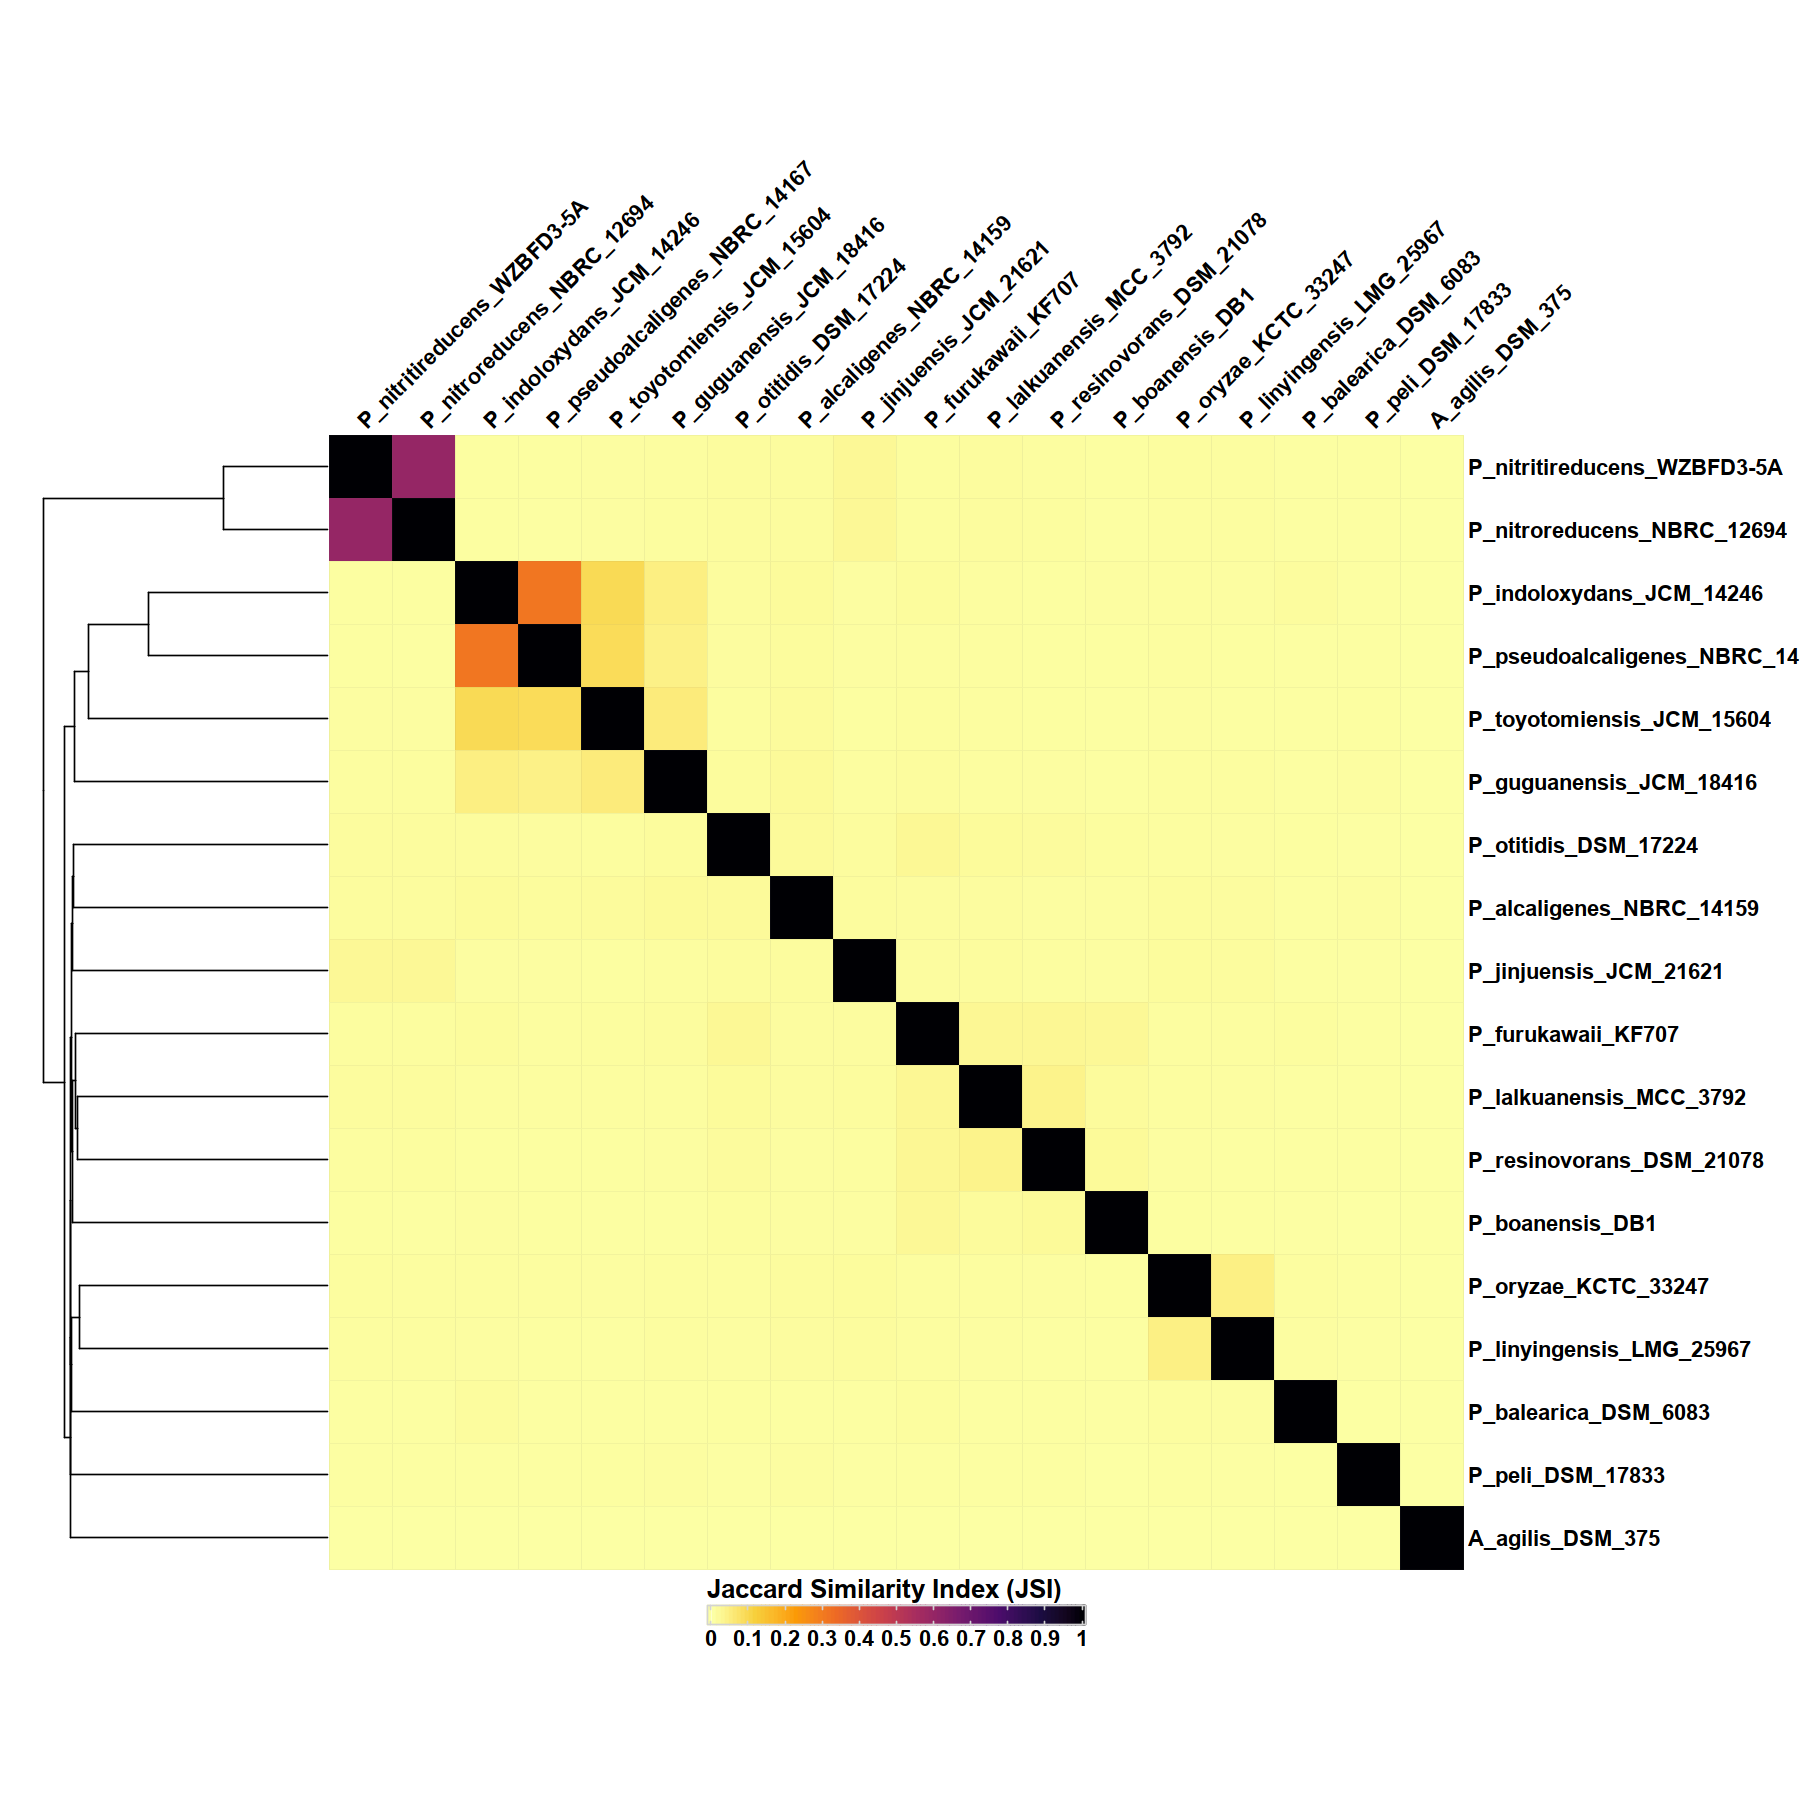

In [5]:
# Plot

## set plot params
options(repr.plot.height=15, repr.plot.width = 15)

## convert df to matrix
tygs.cmp.mat <- as.matrix(smash.cmp.tygs)

# make 'smash_mat' numeric in type
class(tygs.cmp.mat) <- "numeric"

## set matrix color
tygs.cmp.mat.color <- inferno(direction = -1, 10)

## Plot Matrix
tygs.cmp_chm <- 
  Heatmap(tygs.cmp.mat,
          name = "Jaccard Similarity Index (JSI)",
          height = unit(24, "cm"),
          width = unit(24, "cm"),
          cluster_rows = T,
          rect_gp = gpar(col = "grey40", lwd = 0.05),
          heatmap_legend_param = list(at = seq(0,
                                               1, 0.1),
                                      legend_direction = "horizontal",
                                      legend_width = unit(8, "cm"),
                                      nrow = 1,
                                      border = "lightgrey",
                                      title_position = "topleft",
                                      title_gp = gpar(fontsize = 15, fontface = "bold"),
                                      labels_gp = gpar(fontsize = 13, fontface = "bold")
                                     ),
          col = tygs.cmp.mat.color,
          row_names_gp = gpar(fontsize = 13, fontface = "bold"),
          column_names_gp = gpar(fontsize = 13, fontface = "bold"),
          column_names_rot = 45,
          column_names_side = "top",
          show_column_names = TRUE,
          show_column_dend = FALSE,
          show_row_names = TRUE,
          row_dend_width = unit(6, "cm")
          )


## Draw Plot

draw(tygs.cmp_chm, heatmap_legend_side = "bottom")

# Save plot to PDF
pdf("sourmash/tygs_strains/r_plots/k31.smash.cmp_chm.pdf", width = 17, height = 13)
draw(tygs.cmp_chm, heatmap_legend_side = "bottom")
dev.off()

### 2. _**rpoD**_ phylogenetic analysis

[Back to Top](#Analysis-Overview)

> Use ncbi e-utilities to download fasta nucleotide sequences of the _**rpoD**_ marker gene from each of the 18 WGS assemblies being investigated.

### Download _RpoD_ protein sequences from each isolate genome

In [64]:
%%bash

# make rpoD analysis directory
mkdir -p rpoD_analysis/ncbi_assembly_faa
tree -L 2 .

#head -n 2 tygs-dddh-pseudomonas-wgs-list.txt

# loop through assembly accessions to download rpoD sequences for each WGS assembly
for i in $(cat tygs-dddh-pseudomonas-wgs-list.txt | cut -f1)
do
    name="$(grep $i tygs-dddh-pseudomonas-wgs-list.txt | cut -f2)"
    echo -e "Downloading rpoD gene protein sequence for:"
    echo -e $i
    echo $name
    echo -e "\n"
        esearch -db assembly -query $i | elink -target nuccore \
        -name assembly_nuccore_refseq | elink -target protein | efilter -query "RpoD" | efetch -format fasta \
        > rpoD_analysis/ncbi_assembly_faa/${name}-rpoD.faa
done

.
├── p-boanensis-sourmash-analysis.ipynb
├── rpoD_analysis
│   ├── all_rpoD.faa
│   ├── all_rpoD_protein_accessions.tsv
│   └── ncbi_assembly_faa
├── sourmash
│   ├── all_refseq_reps
│   └── tygs_strains
├── test.faa
└── tygs-dddh-pseudomonas-wgs-list.txt

5 directories, 5 files
GCF_018704125.1
P_boanensis_DB1


GCF_007830255.1
A_agilis_DSM_375


GCF_900099645.1
P_peli_DSM_17833


GCF_000467105.1
P_alcaligenes_NBRC_14159


GCF_900104265.1
P_guguanensis_JCM_18416


GCF_900115695.1
P_toyotomiensis_JCM_15604


GCF_003052605.1
P_indoloxydans_JCM_14246


GCF_002091775.1
P_pseudoalcaligenes_NBRC_14167


GCF_000818015.1
P_balearica_DSM_6083


GCF_900109175.1
P_linyingensis_LMG_25967


GCF_900104805.1
P_oryzae_KCTC_33247


GCF_900103845.1
P_jinjuensis_JCM_21621


GCF_002091755.1
P_nitroreducens_NBRC_12694


GCF_010994165.1
P_nitritireducens_WZBFD3-5A


GCF_900111835.1
P_otitidis_DSM_17224


GCF_002355475.1
P_furukawaii_KF707


GCF_000423545.1
P_resinovorans_DSM_21078


GCF_008807375.1
P_lalku

### Count sequence length for each isolate _RpoD_ fasta sequence retrieved


In [44]:
%%bash

for i in $(cat tygs-dddh-pseudomonas-wgs-list.txt | cut -f1)
do
    name="$(grep $i tygs-dddh-pseudomonas-wgs-list.txt | cut -f2)"
    echo -e "The number of amino acids in rpoD gene sequence for the following isolate is:"
    echo -e $i
    echo $name
    cat rpoD_analysis/ncbi_assembly_faa/${name}-rpoD.faa | tail -n +2 | wc -c
    echo -e "\n"

done

The number of amino acids in rpoD gene sequence for the following isolate is:
GCF_018704125.1
P_boanensis_DB1
626


The number of amino acids in rpoD gene sequence for the following isolate is:
GCF_007830255.1
A_agilis_DSM_375
629


The number of amino acids in rpoD gene sequence for the following isolate is:
GCF_900099645.1
P_peli_DSM_17833
623


The number of amino acids in rpoD gene sequence for the following isolate is:
GCF_000467105.1
P_alcaligenes_NBRC_14159
621


The number of amino acids in rpoD gene sequence for the following isolate is:
GCF_900104265.1
P_guguanensis_JCM_18416
624


The number of amino acids in rpoD gene sequence for the following isolate is:
GCF_900115695.1
P_toyotomiensis_JCM_15604
624


The number of amino acids in rpoD gene sequence for the following isolate is:
GCF_003052605.1
P_indoloxydans_JCM_14246
624


The number of amino acids in rpoD gene sequence for the following isolate is:
GCF_002091775.1
P_pseudoalcaligenes_NBRC_14167
624


The number of amino

### Export _RpoD_ protein sequence accession number

In [62]:
%%bash

# create a map file with isolate name and rpoD protein sequence accessions
rm -f rpoD_analysis/all_rpoD_protein_accessions.tsv

for i in $(cat tygs-dddh-pseudomonas-wgs-list.txt | cut -f1)
do
    name="$(grep $i tygs-dddh-pseudomonas-wgs-list.txt | cut -f2)"
    acc=`head -n 1 rpoD_analysis/ncbi_assembly_faa/${name}-rpoD.faa | cut -d ' ' -f 1 | sed -e 's/>//'`
    echo -e "$name\t$acc" >> rpoD_analysis/all_rpoD_protein_accessions.tsv
done

cat rpoD_analysis/all_rpoD_protein_accessions.tsv

P_boanensis_DB1	WP_215380666.1
A_agilis_DSM_375	WP_144572096.1
P_peli_DSM_17833	WP_090256058.1
P_alcaligenes_NBRC_14159	WP_021702509.1
P_guguanensis_JCM_18416	WP_024309708.1
P_toyotomiensis_JCM_15604	WP_074917243.1
P_indoloxydans_JCM_14246	WP_104727426.1
P_pseudoalcaligenes_NBRC_14167	WP_084340924.1
P_balearica_DSM_6083	WP_043218366.1
P_linyingensis_LMG_25967	WP_090312679.1
P_oryzae_KCTC_33247	WP_090350378.1
P_jinjuensis_JCM_21621	WP_084314942.1
P_nitroreducens_NBRC_12694	WP_024763616.1
P_nitritireducens_WZBFD3-5A	WP_024763616.1
P_otitidis_DSM_17224	WP_044405638.1
P_furukawaii_KF707	WP_003450767.1
P_resinovorans_DSM_21078	WP_028631094.1
P_lalkuanensis_MCC_3792	WP_151131514.1


### Concatenate rpoD Protein Sequences

In [63]:
%%bash

# concatenate the rpoD sequences into a single file
rm -f rpoD_analysis/all_rpoD.faa

for i in $(cat tygs-dddh-pseudomonas-wgs-list.txt | cut -f1)
do
    name="$(grep $i tygs-dddh-pseudomonas-wgs-list.txt | cut -f2)"
    acc="$(grep $name rpoD_analysis/all_rpoD_protein_accessions.tsv | cut -f2)"
    echo -e ">$name[$i]_RpoD[$acc]" >> rpoD_analysis/all_rpoD.faa
    cat rpoD_analysis/ncbi_assembly_faa/${name}-rpoD.faa | tail -n +2 >> rpoD_analysis/all_rpoD.faa
done

cat rpoD_analysis/all_rpoD.faa

>P_boanensis_DB1[GCF_018704125.1]_RpoD[WP_215380666.1]
MSGKAQQQSRLKELIARGREQGYLTYAEVNDHLPEDISDPEQVEDIIRMINDMGINVFESAPDADALLLA
EADTDEAAAEEAAAALAAVETDIGRTTDPVRMYMREMGTVELLTREGEIEIAKRIEEGIREVMSAIAHFP
GAVDGILSEYQRVTTEGGRLSDVLSGYIDPDDGTLPAEEVEPVELKDNAAAAKDKDEDEEEEGESDDAEE
EGDGGPDPEEALRRFTAVSDQLENAKKALKKHGRGSKQAAEELLALAELFMPIKLVPKQFDALVEKVRGA
LDRVRAQERAIMQLCVRDARMPRADFLRLFPSNEVDLTWADGLAKGKAKYAEAIGRLVDDIKRNQQKLVD
LEKEVDLTVNDIKDINRRMSIGEAKARRAKKEMVEANLRLVISIAKKYTNRGLQFLDLIQEGNIGLMKAV
DKFEYRRGYKFSTYATWWIRQAITRSIADQARTIRIPVHMIETINKLNRISRQMLQEMGREPTPEELGER
MEMPEDKIRKVLKIAKEPISMETPIGDDEDSHLGDFIEDSTMQSPIDVATVESLKEATREVLAGLTAREA
KVLRMRFGIDMNTDHTLEEVGKQFDVTRERIRQIEAKALRKLRHPSRSEHLRSFLDE
>A_agilis_DSM_375[GCF_007830255.1]_RpoD[WP_144572096.1]
MSGKAQQQSRLKELIQRGREQGYLTYAEVNDHLPEDISDPEQVEDIIRMINDMGINVFEVAPDADALLLS
EAETDEAAAEEAAAALAAVETDIGRTTDPVRMYMREMGTVELLTREGEIEIAKRIEEGIREVMGAVAHFP
GSVATILSEYERVVSESGRLSDVLSGYIDPDDDGAAVEAEIEPVLQASTAKAVVDDDKDEDEDEEGSDSE
DDEEGDGGPDPEIARQRFTAVADQLALTTAVLEQHGRDSAKGIAALEALA

### Retrieve specific nucleotide accessions and generate upgraded map file

> resources:
> * [biostars](https://www.biostars.org/p/429609/)

In [110]:
%%bash

# retrieve Nucleotide accessions corresponding to rpoD proteins of target genome assemblies

rm -f rpoD_analysis/pseudomonas_rpoD_acc_map.tsv

for asm in $(cat tygs-dddh-pseudomonas-wgs-list.txt | cut -f1)
do
    name="$(grep $asm tygs-dddh-pseudomonas-wgs-list.txt | cut -f2)"
    aaacc="$(grep $name rpoD_analysis/all_rpoD_protein_accessions.tsv | cut -f2)"
    ntacc=`efetch -db ipg -id $aaacc -format ipg | grep $asm | cut -f 3`
    echo -e "$name\t$asm\t$ntacc\t$aaacc" >> rpoD_analysis/pseudomonas_rpoD_acc_map.tsv
done

### Retrieve Nucleotide _RpoD_ Gene sequences in FASTA format using Protein Accession numbers

> Use [`ncbi datasets` command line utility](https://www.ncbi.nlm.nih.gov/datasets/docs/v1/quickstarts/command-line-tools/) to download nucleotide fasta sequences that correspond to each _**RpoD**_ amino acid sequence.
>
> resources:
> * [github issue](https://github.com/NCBI-Hackathons/EDirectCookbook/issues/47)

### Download all sequences matching `WP` numbers

> __Note 1__: multiple assemblies have protein annotations with the identical WP number. Because of this, we use the nucleotide accessions previously retrieved to extract sequences derived from the targeted isolate assemblies.
>

In [102]:
%%bash

cd rpoD_analysis/

rm -rf ncbi_data*

# create protein accession input file for batch ncbi download
cat all_rpoD_protein_accessions.tsv | cut -f 2 > ncbi_datasets_rpoD_aa_input.txt

# Download sequence archive
datasets download gene accession --inputfile ncbi_datasets_rpoD_aa_input.txt

# uncompress
unzip ncbi_dataset.zip

Downloading: ncbi_dataset.zip    847B 2.38MB/s
Downloading: ncbi_dataset.zip    847B 2.38MB/s
Downloading: ncbi_dataset.zip    847B 2.38MB/s
Downloading: ncbi_dataset.zip    847B 2.38MB/s
Downloading: ncbi_dataset.zip    847B 2.38MB/s
Downloading: ncbi_dataset.zip    847B 2.38MB/s
Downloading: ncbi_dataset.zip    847B 2.38MB/s
Downloading: ncbi_dataset.zip    847B 2.38MB/s
Downloading: ncbi_dataset.zip    847B 2.38MB/s
Downloading: ncbi_dataset.zip    847B 2.38MB/s
Downloading: ncbi_dataset.zip    847B 2.38MB/s
Downloading: ncbi_dataset.zip    847B 2.38MB/s
Downloading: ncbi_dataset.zip    847B 2.38MB/s
Downloading: ncbi_dataset.zip    847B 2.38MB/s
Downloading: ncbi_dataset.zip    847B 2.38MB/s
Downloading: ncbi_dataset.zip    847B 2.38MB/s
Downloading: ncbi_dataset.zip    847B 2.38MB/s
Downloading: ncbi_dataset.zip    847B 2.38MB/s
Downloading: ncbi_dataset.zip    847B 2.38MB/s
Downloading: ncbi_dataset.zip    847B 2.38MB/s
Downloading: ncbi_dataset.zip    847B 2.38MB/s
Downloading: 

> __Note 2__: _P. boanensis_ DB1 nucleotide accession is not linked with the protein WP number...
> `NZ_JAGTIS010000021.1:51907-53760` | `WP_215380666.1` --> Will download manually...

### Fetch DB1 _RpoD_ fasta nucleotide sequence

> Reference: https://www.ncbi.nlm.nih.gov/nuccore/NZ_JAGTIS010000021.1?from=51907&to=53760&report=fasta

In [122]:
%%bash

efetch -db nuccore -id NZ_JAGTIS010000021.1 -format fasta -seq_start 51907 -seq_stop 53760 \
    > rpoD_analysis/P_boanensis_DB1-rpoD.fna

cat rpoD_analysis/P_boanensis_DB1-rpoD.fna

>NZ_JAGTIS010000021.1:51907-53760 Pseudomonas sp. DB1 AS-pseudo_contig21, whole genome shotgun sequence
ATGTCCGGAAAAGCGCAACAGCAGTCTCGCCTCAAAGAGTTGATCGCCCGTGGCCGTGAGCAGGGATACC
TGACTTACGCGGAGGTCAACGACCACCTGCCGGAGGATATTTCCGATCCGGAACAGGTGGAAGATATCAT
CCGCATGATCAACGACATGGGGATCAACGTATTCGAGAGTGCTCCGGATGCGGATGCCCTGTTGCTGGCC
GAAGCCGACACCGACGAAGCCGCAGCCGAGGAAGCTGCAGCCGCCCTCGCTGCTGTCGAGACCGATATTG
GCCGCACCACCGACCCCGTGCGCATGTACATGCGTGAAATGGGTACCGTGGAACTGCTGACCCGCGAAGG
CGAGATCGAAATCGCCAAACGCATCGAGGAAGGCATCCGCGAGGTGATGAGCGCCATCGCCCACTTCCCA
GGGGCGGTCGACGGCATTCTCTCCGAGTACCAGCGCGTCACCACTGAAGGTGGCCGCCTCTCCGACGTTC
TCAGCGGCTACATCGACCCCGATGACGGCACCCTGCCGGCAGAAGAAGTCGAGCCTGTCGAGCTGAAGGA
CAACGCCGCCGCGGCCAAAGACAAGGACGAGGACGAAGAGGAAGAAGGCGAAAGCGACGACGCCGAGGAA
GAAGGCGACGGTGGTCCGGACCCGGAAGAGGCCCTGCGCCGCTTCACGGCAGTATCCGACCAGCTGGAAA
ACGCCAAGAAGGCCTTGAAGAAGCACGGTCGCGGCAGCAAGCAAGCGGCTGAAGAACTGCTCGCCCTGGC
TGAACTGTTCATGCCGATCAAGCTGGTGCCGAAGCAATTCGACGCCCTGGTGGAGAAGGTCCGCGGTGCA
CTGGACCGTGTCCGTGCCCAAGAACGCGCCATCATGCAGCTCTG

### Extract targeted nucleotide sequences using Pseudomonas _RpoD_ accessionmap file

In [121]:
%%bash

# store accession targets in variable
cat rpoD_analysis/pseudomonas_rpoD_acc_map.tsv | cut -f3 | tail -n +2 > pseudomonas_ref_rpoD_extract_input.txt

cat pseudomonas_ref_rpoD_extract_input.txt

# extract fastas with bbmap utility filterbyname.sh
filterbyname.sh \
    in=rpoD_analysis/ncbi_dataset/data/gene.fna \
    out=rpoD_analysis/pseudomonas_rpoD_genes.fna \
    include=t \
    overwrite=t \
    names=pseudomonas_ref_rpoD_extract_input.txt \
    substring
    
grep "^>" rpoD_analysis/pseudomonas_rpoD_genes.fna | wc -l

echo -e "\n"

head -n 20 rpoD_analysis/pseudomonas_rpoD_genes.fna

NZ_VLKG01000009.1
NZ_FMTL01000007.1
NZ_BATI01000037.1
NZ_FNJJ01000018.1
NZ_FOXK01000009.1
NZ_QASO01000059.1
NZ_BDAJ01000015.1
NZ_CP007511.1
NZ_FNZE01000014.1
NZ_LT629751.1
NZ_FNIJ01000010.1
NZ_BDAI01000012.1
NZ_WMBX01000004.1
NZ_FOJP01000001.1
NZ_AP014862.1
NZ_KE384032.1
NZ_CP043311.1
17


>NZ_AP014862.1:c544790-542937 rpoD [protein_accession=WP_003450767.1] [organism=Pseudomonas furukawaii] [name=RNA polymerase sigma factor RpoD] [gene=rpoD]
ATGTCCGGAAAAGCGCAACAGCAGTCTCGCCTCAAAGAGTTGATCGCCCGTGGCCGTGAGCAGGGATACC
TGACTTACGCGGAGGTCAACGACCACCTGCCGGAGGATATTTCCGATCCGGAACAGGTGGAAGACATCAT
CCGCATGATCAACGACATGGGGATCAACGTATTCGAGAGTGCCCCGGATGCGGATGCCCTGTTGCTGGCC
GAAGCCGACACCGACGAAGCCGCAGCCGAAGAAGCCGCCGCCGCCCTGGCCGCGGTGGAGACCGACATCG
GTCGCACCACCGACCCAGTGCGCATGTACATGCGTGAAATGGGCACCGTGGAGCTGCTGACCCGCGAAGG
CGAGATCGAAATCGCCAAACGCATCGAAGAAGGCATCCGTGAAGTGATGAGCGCTATCGCCCACTTCCCC
GGAGCCGTCGACGGCATTCTCAGCGAATACCACCGCGTCACCACCGAAGGTGGCCGCCTCTCCGACGTAC
TCAACGGCTACATCGATCCTGATGACGGCACCCTGCCGGCCGAAGAAGTCGAGCCT

java -ea -Xmx365973m -cp /ceph/home/shigdon/.conda/envs/smash-jupyter/opt/bbmap-38.95-0/current/ driver.FilterReadsByName in=rpoD_analysis/ncbi_dataset/data/gene.fna out=rpoD_analysis/pseudomonas_rpoD_genes.fna include=t overwrite=t names=pseudomonas_ref_rpoD_extract_input.txt substring
Executing driver.FilterReadsByName [in=rpoD_analysis/ncbi_dataset/data/gene.fna, out=rpoD_analysis/pseudomonas_rpoD_genes.fna, include=t, overwrite=t, names=pseudomonas_ref_rpoD_extract_input.txt, substring]

Input is being processed as unpaired
Time:                         	0.177 seconds.
Reads Processed:          54 	0.30k reads/sec
Bases Processed:       99912 	0.56m bases/sec
Reads Out:          17
Bases Out:          31476


### Join 17 reference sequences with DB1 sequence (concatenate)

In [127]:
%%bash

cd rpoD_analysis/

cat P_boanensis_DB1-rpoD.fna pseudomonas_rpoD_genes.fna > all_pseudomonas_rpoD_genes.fna

grep "^>" all_pseudomonas_rpoD_genes.fna | wc -l

18


### Simplify FASTA headers

> Fasta headers are overly verbose; Use R package `phylotools` to make headers easier to read.

#### Make map file with original sequence names and new sequence names

> This file contains the accession information from NCBI for each gene sequence used to make the phylogenetic tree.

In [139]:
%%bash

cd rpoD_analysis/

# remove spaces in original headers
sed -e 's/ /_/g' all_pseudomonas_rpoD_genes.fna > all_pseudomonas_rpoD_genes2.fna

#grep "^>" all_pseudomonas_rpoD_genes2.fna | head -n 1

rm -f rename_fasta_map.tsv

echo -e "old_name\tnew_name" > rename_fasta_map.tsv

for name in $(cat pseudomonas_rpoD_acc_map.tsv | cut -f 1)
do
    asm="$(grep $name pseudomonas_rpoD_acc_map.tsv | cut -f 2)"
    ntacc="$(grep $name pseudomonas_rpoD_acc_map.tsv | cut -f 3)"
    aaacc="$(grep $name pseudomonas_rpoD_acc_map.tsv | cut -f 4)"
    oldname="$(grep $ntacc all_pseudomonas_rpoD_genes2.fna | sed -e 's/>//g')"
    newname=${name}-${asm}_RpoD
    echo -e "$oldname\t$newname" >> rename_fasta_map.tsv
done

#cat rename_fasta_map.tsv

#### Rename the headers in R

> _**Switch to IR Kernel**_ and use `rename.fasta` function from `phylotools` package

In [11]:
suppressPackageStartupMessages(library(phylotools))
suppressPackageStartupMessages(library(tidyverse))

In [14]:
# read in map file
header_map <- read_tsv("./rpoD_analysis/rename_fasta_map.tsv", col_names = TRUE)

rename.fasta(infile = "./rpoD_analysis/all_pseudomonas_rpoD_genes2.fna",
            ref_table = header_map,
            outfile = "rpoD_analysis/all_pseudomonas_rpoD-renamed.fna")


── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  old_name = col_character(),
  new_name = col_character()
)




rpoD_analysis/all_pseudomonas_rpoD-renamed.fna has been saved to  /ceph/projects/pboanensis_smh 


In [7]:
%%bash

cat rpoD_analysis/all_pseudomonas_rpoD-renamed.fna | grep "^>"

>P_furukawaii_KF707-GCF_002355475.1_RpoD
>P_alcaligenes_NBRC_14159-GCF_000467105.1_RpoD
>P_nitroreducens_NBRC_12694-GCF_002091755.1_RpoD
>P_pseudoalcaligenes_NBRC_14167-GCF_002091775.1_RpoD
>P_balearica_DSM_6083-GCF_000818015.1_RpoD
>P_lalkuanensis_MCC_3792-GCF_008807375.1_RpoD
>P_peli_DSM_17833-GCF_900099645.1_RpoD
>P_jinjuensis_JCM_21621-GCF_900103845.1_RpoD
>P_guguanensis_JCM_18416-GCF_900104265.1_RpoD
>P_linyingensis_LMG_25967-GCF_900109175.1_RpoD
>P_otitidis_DSM_17224-GCF_900111835.1_RpoD
>P_toyotomiensis_JCM_15604-GCF_900115695.1_RpoD
>P_boanensis_DB1-GCF_018704125.1_RpoD
>P_resinovorans_DSM_21078-GCF_000423545.1_RpoD
>P_oryzae_KCTC_33247-GCF_900104805.1_RpoD
>P_indoloxydans_JCM_14246-GCF_003052605.1_RpoD
>A_agilis_DSM_375-GCF_007830255.1_RpoD
>P_nitritireducens_WZBFD3-5A-GCF_010994165.1_RpoD


### RAxML phylogenetic analysis

> Step 1: Generate Multiple Sequence Alignment (MSA) with `MUSCLE 5.1`
>
> Step 2: Generate Maximum Likelihood (ML) tree with `RAxML 8.2.12`
>
> Step 3: Visualize Tree

#### Step1: MSA

In [8]:
%%bash

# make MSA work dir
mkdir -p rpoD_analysis/MUSCLE_MSA

cd rpoD_analysis/MUSCLE_MSA/

# generate msa
muscle -align ../all_pseudomonas_rpoD-renamed.fna -output pseudo_rpoD_muscle-aln.fasta

# create ensemble and check alignment for errors
muscle -align ../all_pseudomonas_rpoD-renamed.fna -stratified -output ensemble.efa

# measure dispersion of ensemble
muscle -disperse ensemble.efa


muscle 5.1.linux64 []  516Gb RAM, 96 cores
Built Feb 10 2022 07:51:02
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

Input: 18 seqs, avg length 1852, max 1863

00:00 18Mb   CPU has 96 cores, defaulting to 20 threads
00:05 3.3Gb   100.0% Calc posteriors
00:05 1.5Gb   100.0% Consistency (1/2)
00:05 1.5Gb   100.0% Consistency (2/2)
00:05 1.5Gb   100.0% UPGMA5
00:06 1.5Gb   100.0% Refining

muscle 5.1.linux64 []  516Gb RAM, 96 cores
Built Feb 10 2022 07:51:02
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

Input: 18 seqs, avg length 1852, max 1863

Replicate 1/16, none.0
00:00 18Mb   CPU has 96 cores, defaulting to 20 threads
00:05 3.3Gb   100.0% Calc posteriors
00:05 1.5Gb   100.0% Consistency (1/2)
00:05 1.5Gb   100.0% Consistency (2/2)
00:05 1.5Gb   100.0% UPGMA5
00:06 1.5Gb   100.0% Refining
Replicate 2/16, abc.0        
00:10 3.1Gb   100.0% Calc posteriors
00:11 1.5Gb   100.0% Consistency (1/2)
00:11 1.5Gb   100.0% Consistency (2/2)
00:11 1.5Gb   100.0% UPG

> Measured dispersion is low and below 0.05. This implies all MSAs in ensemble are the same and alignment is robust; likely to have no errors.

#### Step2: RAxML

> **Resources:**
>
> * https://cme.h-its.org/exelixis/resource/download/NewManual.pdf

In [11]:
%%bash

# make raxml directory
mkdir -p rpoD_analysis/RAxML/

cd rpoD_analysis/RAxML/

# link to msa input 
ln -fs ../MUSCLE_MSA/pseudo-rpoD_muscle-aln.fasta

# run RAxML with 1000 bootstrap interations
raxmlHPC \
    -s pseudo-rpoD_muscle-aln.fasta \
    -n pseudo-rpoD_raxml-trees.out \
    -m GTRCAT \
    -f a \
    -x 888 \
    -p 777 \
    -N 1000


RAxML can't, parse the alignment file as phylip file 
it will now try to parse it as FASTA file



Using BFGS method to optimize GTR rate parameters, to disable this specify "--no-bfgs" 



This is RAxML version 8.2.12 released by Alexandros Stamatakis on May 2018.

With greatly appreciated code contributions by:
Andre Aberer      (HITS)
Simon Berger      (HITS)
Alexey Kozlov     (HITS)
Kassian Kobert    (HITS)
David Dao         (KIT and HITS)
Sarah Lutteropp   (KIT and HITS)
Nick Pattengale   (Sandia)
Wayne Pfeiffer    (SDSC)
Akifumi S. Tanabe (NRIFS)
Charlie Taylor    (UF)


Alignment has 629 distinct alignment patterns

Proportion of gaps and completely undetermined characters in this alignment: 0.93%

RAxML rapid bootstrapping and subsequent ML search

Using 1 distinct models/data partitions with joint branch length optimization



Executing 1000 rapid bootstrap inferences and thereafter a thorough ML search 

All free model parameters will be estimated by RAxML
ML estimate of 25 

#### 3. Visualize Tree in `R`

> _**Switch to IR kernel**_ and use `ggtree` and `phangorn` pacakges to plot the tree.
>
> **Resources:**
> 
> * https://github.com/YuLab-SMU/ggtree/issues/89
>
> **Notes:**
>
> `-GCF_[^:]*` used substitution regex pattern in vim `(%s///g)` to make tip labels cleaner (i.e. remove assembly accession number and rpoD tags)

In [34]:
suppressPackageStartupMessages(library(ape))
suppressPackageStartupMessages(library(ggtree))
suppressPackageStartupMessages(library(phangorn))
suppressPackageStartupMessages(library(treeio))
suppressPackageStartupMessages(library(ggrepel))

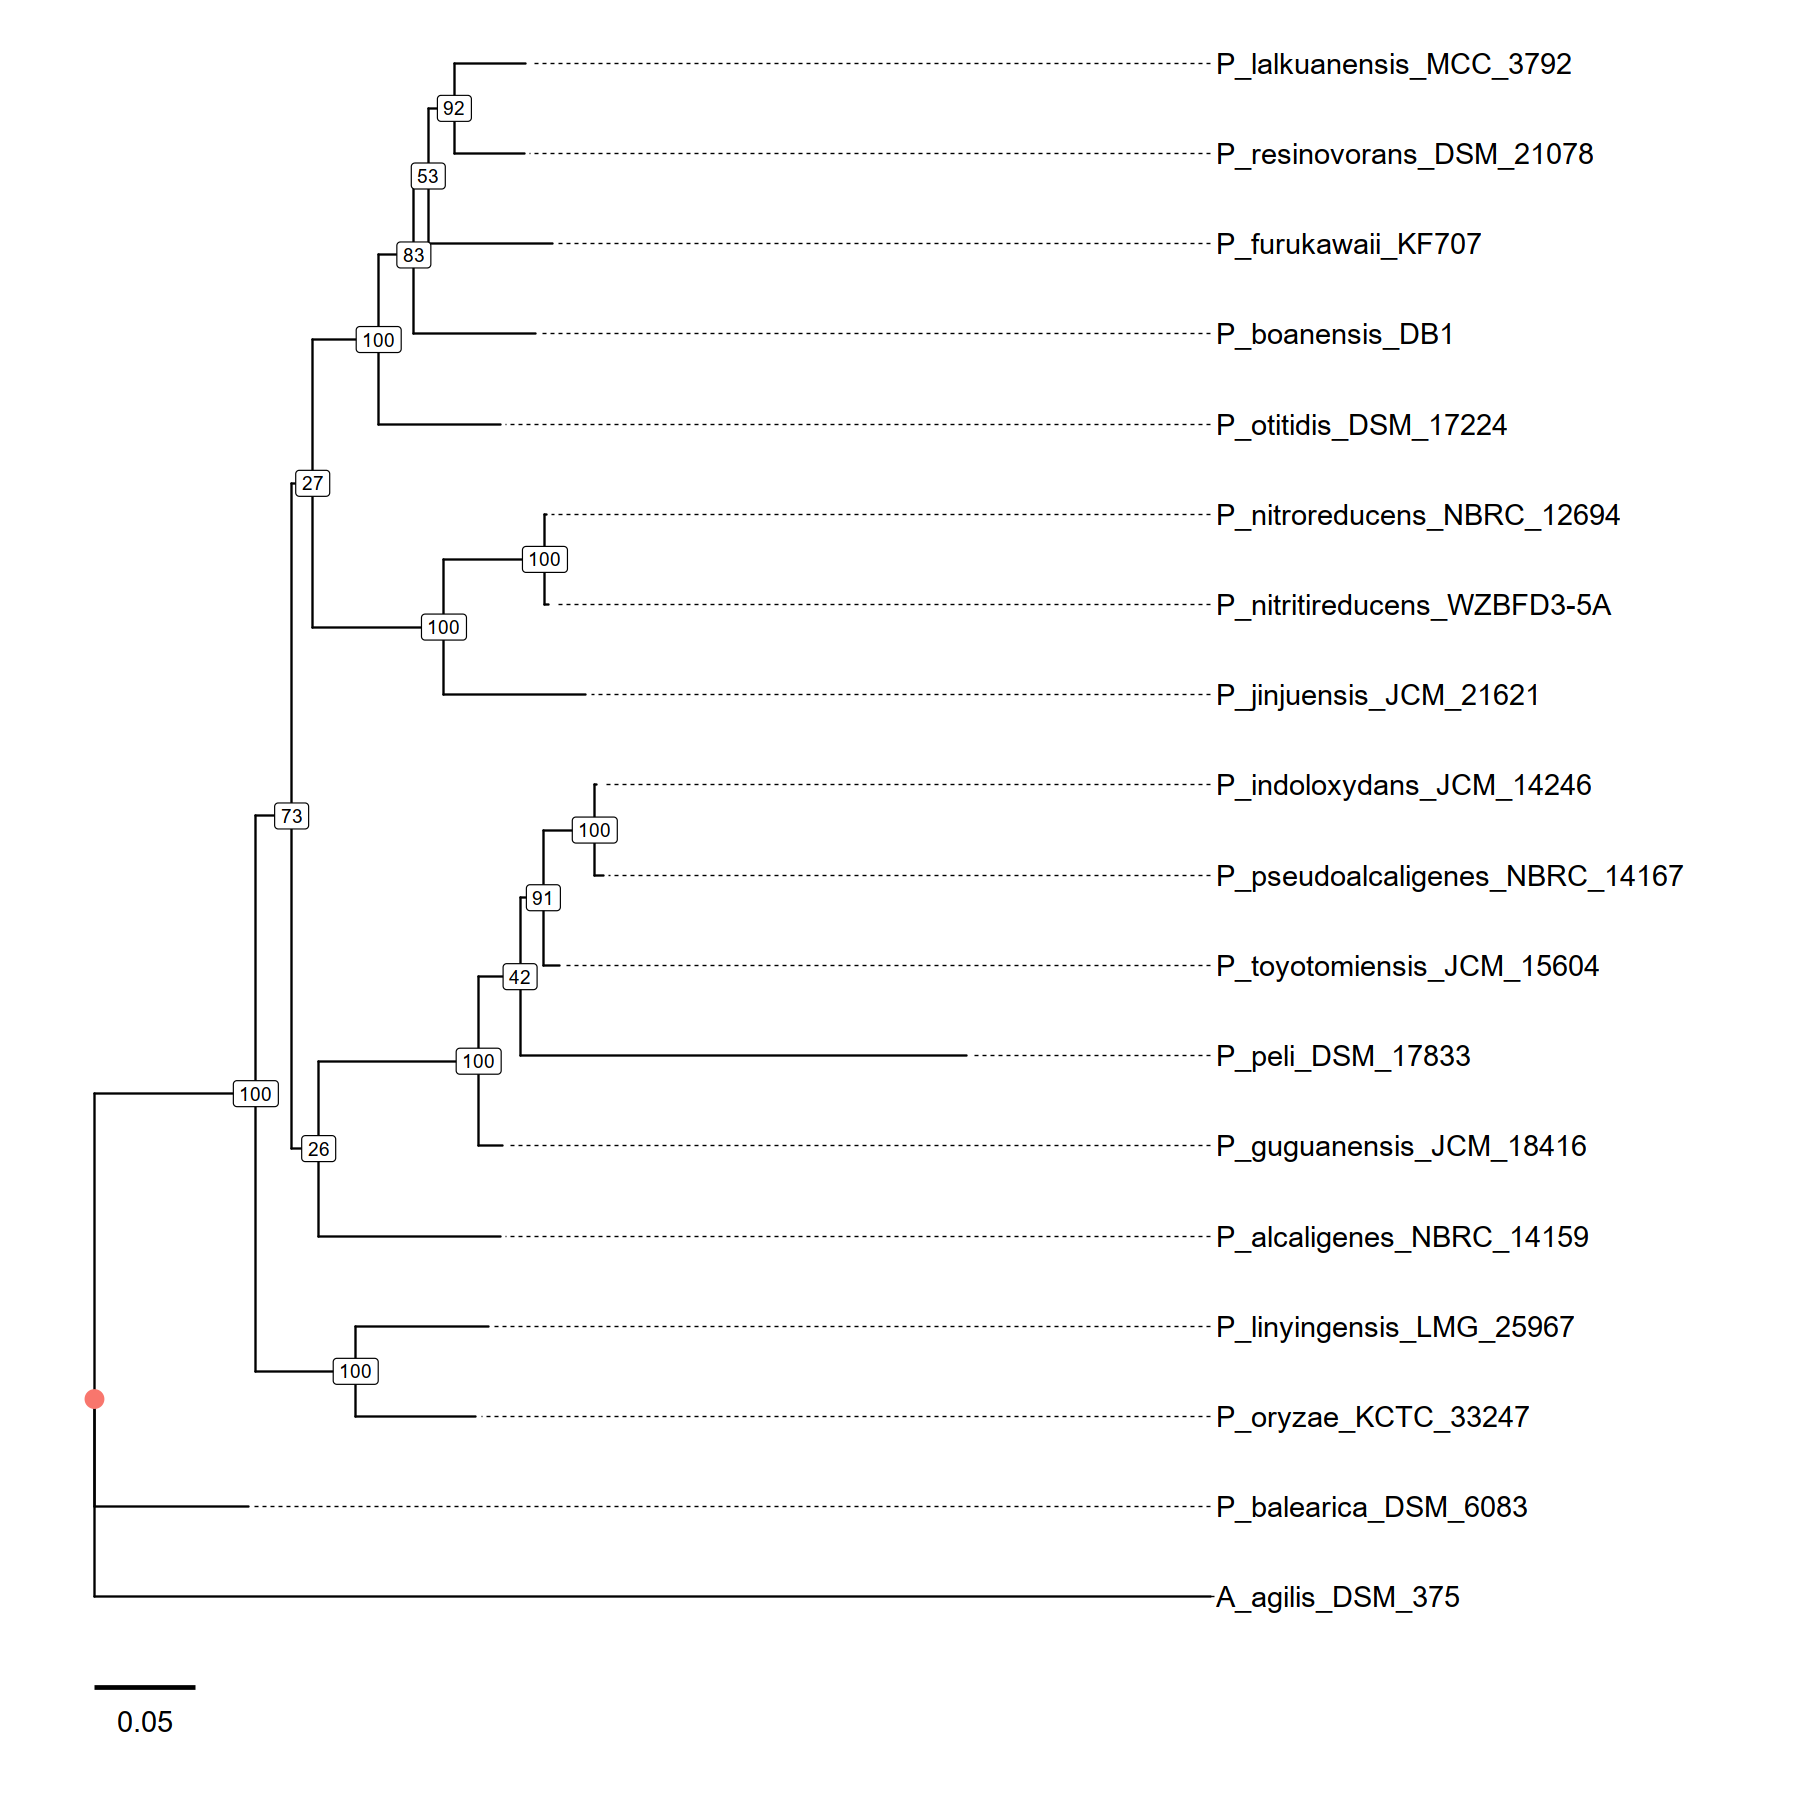

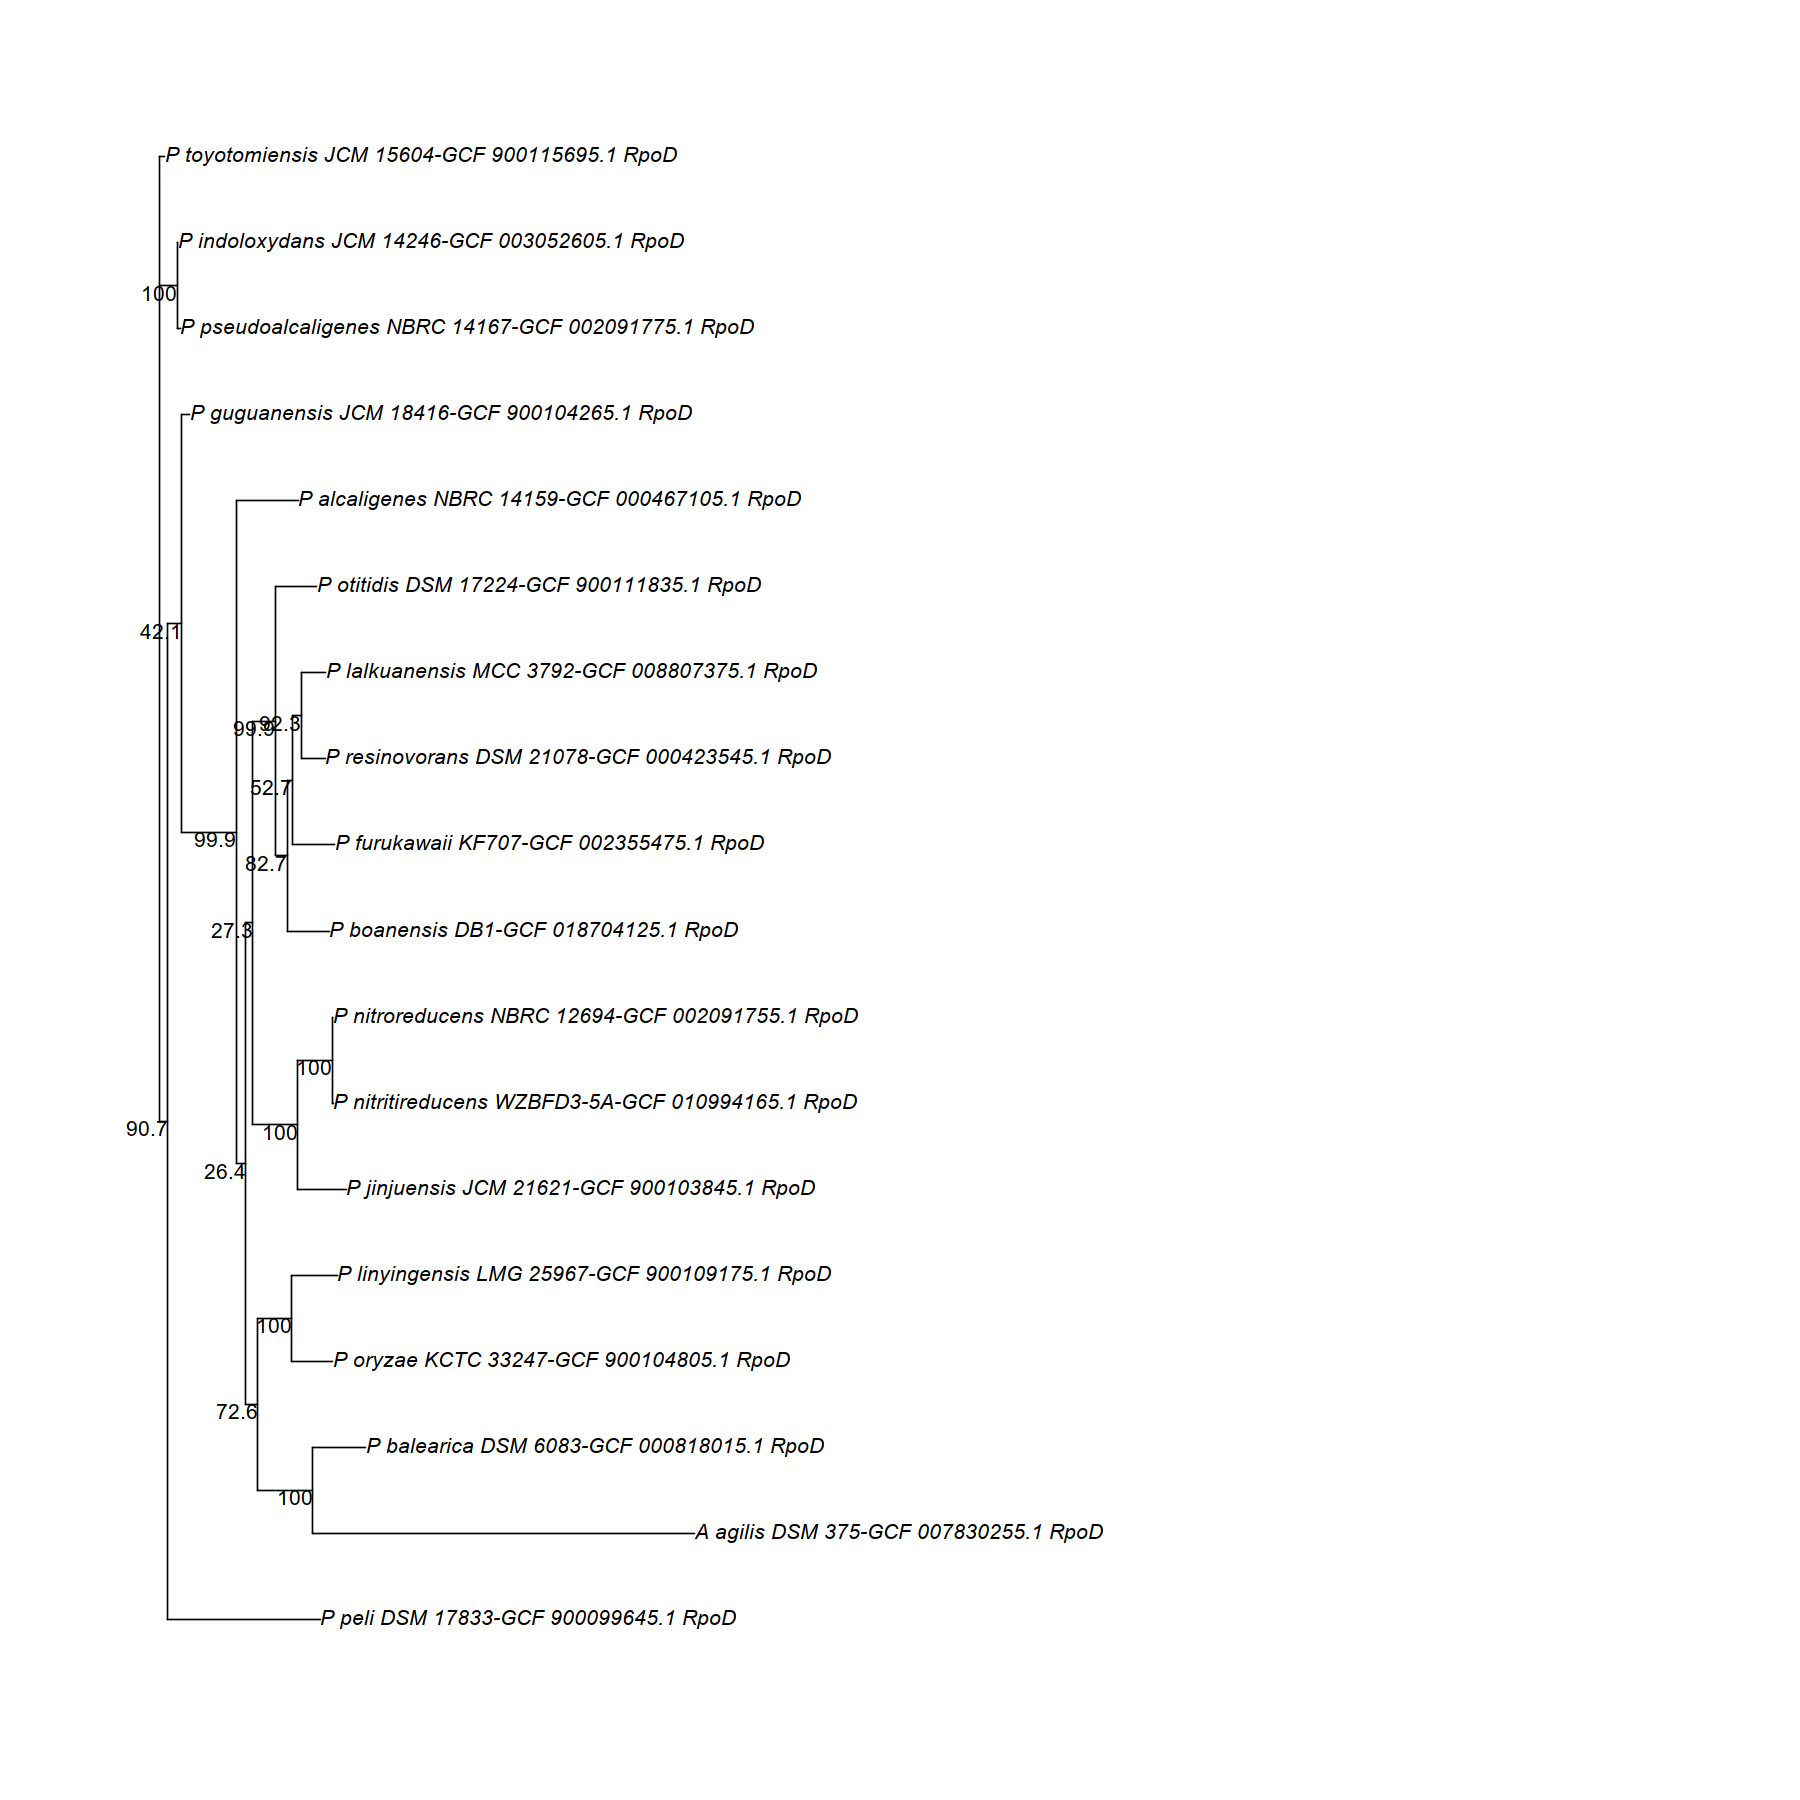

In [179]:
## set plot params
#options(repr.plot.height=15, repr.plot.width = 15)

tree <- read.raxml("./rpoD_analysis/RAxML/test.out")

# root the tree at outgroup
raxml_tree_rooted <- tree
raxml_tree_rooted@phylo <- root(tree@phylo, outgroup = "A_agilis_DSM_375", edgelabel = TRUE)

# make tree
p <- ggtree(raxml_tree_rooted) + 
    geom_tiplab(align = TRUE, linetype = 'dashed', linesize = 0.3, size=6) + 
    geom_label2(aes(label = bootstrap)) + 
    geom_rootpoint(aes(color = "red", size = 6)) +
    geom_treescale(x=0, y=0, fontsize=6, linesize=1, offset=-0.5) +
    xlim(NA, 0.8) +
    theme(legend.position = "none")

    # save plot to file
ggsave("./rpoD_analysis/RAxML/ggtree_rpoD.pdf", p, width = 50, height = 50, units = c("cm"))

#p <- ggtree() +
#    geom_rootpoint() +
#    geom_tiplab(align = TRUE, linetype = 'dashed', linesize = 0.3) +
#    geom_label2(aes(label = bootstrap)) +
#    geom_label_repel(aes(label=bootstrap, fill=bootstrap)) +
#    geom_treescale()

p

# plot natively to compare bootstrap values after rooting above..
raxml.tree <- read.tree("./rpoD_analysis/RAxML/RAxML_bipartitions.pseudo-rpoD_raxml-trees.out")
#raxml.bootstrap <- read.tree("./rpoD_analysis/RAxML/RAxML_bootstrap.pseudo-rpoD_raxml-trees.out")
#par(mfrow=c(1,2))
plotBS(raxml.tree, raxml.bootstrap, "p")
#plotBS(raxml.tree, raxml.bootstrap, "p", "TBE")

#### Interpretation

> Phylogenetic relationship inferred from _RpoD_ tree is comprable to that inferred by WGS MinHash comparison above.

### 3. _**Pseudomonas boanensis**_ isolate purity analysis

[Back to Top](#Analysis-Overview)

> 1. Use `CheckM` to assess isolate purity
> 2. Use `Sourmash gather` and corresponding `gtdb r202 database` to assess isolate purity

In [5]:
%%bash

# make checkm folders and clear previous work
mkdir -p checkM/{p_db1_input,all_asm_input}
rm -rf checkM/p_db1_input/*

# copy p boanensis genome assembly, uncompress and rename
cp sourmash/tygs_strains/ref_asm/GCF_018704125.1_ASM1870412v1_genomic.fna.gz checkM/p_db1_input
gunzip checkM/p_db1_input/GCF_018704125.1_ASM1870412v1_genomic.fna.gz
ls checkM/p_db1_input
mv checkM/p_db1_input/GCF_018704125.1_ASM1870412v1_genomic.fna checkM/p_db1_input/P_boanensis_DB1.fna

head checkM/p_db1_input/P_boanensis_DB1.fna

GCF_018704125.1_ASM1870412v1_genomic.fna
>NZ_JAGTIS010000001.1 Pseudomonas sp. DB1 AS-pseudo_contig1, whole genome shotgun sequence
GGCGACCAGGCCGGAGCCGGCCGGGAAGCTGATGCCGATCGGGAAGCGGGTGTGCGAGTCACCGCCGGTGCCGACGGTGT
CCGGCAGCAGCATGCGGTTCAGCCAGCTGTGGATGATGCCGTCGCCCACCTTGAGCGAGACGCCACCGCGATTGCGCATG
AAGTCAGGCAGGCTGTGGTGGGTGCGCACGTCCACCGGCTTCGGATAGGCGGCGGTGTGGCAGAAAGACTGCATCACCAG
GTCGGCGGAGAAGCCGAGGCAGGCGAGGTCTTTCAGCTCGTCGCGAGTCATCGGCCCCGTGGTGTCCTGGGAGCCGACGG
TGGTCATCTTCGGCTCGCAGTAGGTGCCTGGACGCACGCCCTGGCCTTCCGGCAGACCGCAGGCACGGCCGACCATCTTC
TGCGCCAGGGTGAAGCCCTTGCCGCTGTCGGCCGGGGATTCCGGCATGTTGAACAGGTCGGAAGCACCCAGGCCGAGCTC
GGCACGGGCCTTCTCGGTCAGGCCACGGCCGATGATCAGCGGGATACGGCCGCCGGCGCGAACTTCGTCCAGCAGCACGG
GAGTCTTCAGTTCGAAGGTGGCCAGTTCCTCATCGCTGCCATGACGGCAGACTTTCCCGGCGTAGGGATAAACGTCGATC
ACATCGCCCATGTTGAGGTTGGCGACGTCGAATTCGATCGGCAGGGCGCCGGCGTCTTCCATGGTGTTGTAGAAGATCGG


#### Run `checkM` lineage workflow on _P. boanensis DB1_

In [6]:
%%bash

checkm lineage_wf -t 8 -x fna checkM/p_db1_input/ checkM/p_db1_lwf-out

[2022-02-13 23:03:12] INFO: CheckM v1.1.3
[2022-02-13 23:03:12] INFO: checkm lineage_wf -t 8 -x fna checkM/p_db1_input/ checkM/p_db1_lwf-out
[2022-02-13 23:03:12] INFO: [CheckM - tree] Placing bins in reference genome tree.
[2022-02-13 23:03:13] INFO: Identifying marker genes in 1 bins with 8 threads:
[2022-02-13 23:03:46] INFO: Saving HMM info to file.
[2022-02-13 23:03:46] INFO: Calculating genome statistics for 1 bins with 8 threads:
[2022-02-13 23:03:46] INFO: Extracting marker genes to align.
[2022-02-13 23:03:46] INFO: Parsing HMM hits to marker genes:
[2022-02-13 23:03:46] INFO: Extracting 43 HMMs with 8 threads:
[2022-02-13 23:03:46] INFO: Aligning 43 marker genes with 8 threads:
[2022-02-13 23:03:47] INFO: Reading marker alignment files.
[2022-02-13 23:03:47] INFO: Concatenating alignments.
[2022-02-13 23:03:47] INFO: Placing 1 bins into the genome tree with pplacer (be patient).
[2022-02-13 23:08:37] INFO: { Current stage: 0:05:24.344 || Total: 0:05:24.344 }
[2022-02-13 23:08

    Finished processing 1 of 1 (100.00%) bins.
    Finished processing 1 of 1 (100.00%) bins.
    Finished parsing hits for 1 of 1 (100.00%) bins.
    Finished extracting 43 of 43 (100.00%) HMMs.
    Finished aligning 43 of 43 (100.00%) marker genes.
    Finished parsing hits for 1 of 1 (100.00%) bins.
    Finished processing 1 of 1 (100.00%) bins (current: P_boanensis_DB1).
    Finished processing 1 of 1 (100.00%) bins.
    Finished parsing hits for 1 of 1 (100.00%) bins.
    Finished processing 1 of 1 (100.00%) bins.
    Finished processing 1 of 1 (100.00%) bins.
    Finished parsing hits for 1 of 1 (100.00%) bins.


#### Interpretation

> 100% Completeness score, low contamination score of 0.89, strain heterogeneity score of 0, 807 out of 813 marker genes for the order Pseudomonadales were single copy with 6 of them being dual copy. Collectively these results from CheckM analysis of the _`P. boanensis DB1`_ WGS assembly indicate that the sequenced isolate was/is pure.
>
> See [Here](https://www.biostars.org/p/447744/) for commentary on interpretatino of results.

#### Run `sourmash gather` on _P. boanensis DB1

> Use GTDB r202 database (current release)

In [14]:
%%bash

sourmash gather \
    -k 31 \
    -o sourmash/tygs_strains/smash_analysis/P_boanensis_DB1-gtdb_r202_gather.csv \
    sourmash/tygs_strains/smash_analysis/P_boanensis_DB1.sig \
    /ceph/db/sourmash/gtdb-rs202.genomic.k31.sbt.zip



overlap     p_query p_match
---------   ------- -------
186.0 kbp      3.3%    3.0%    GCF_000262065.2 Pseudomonas furukawai...
132.0 kbp      1.5%    1.4%    GCF_002003485.1 Pseudomonas resinovor...
115.0 kbp      0.9%    0.9%    GCF_001708505.1 Pseudomonas sp. TCU-H...

found 3 matches total;
the recovered matches hit 5.7% of the query




== This is sourmash version 4.2.2. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

selecting specified query k=31
loaded query: P_boanensis_DB1.fna.gz... (k=31, DNA)
loaded 1 databases.
Starting prefetch sweep across databases.
Found 72 signatures via prefetch; now doing gather.
found less than 50.0 kbp in common. => exiting


#### Interpretation:

> Very low proportion of the _P. boanensis DB1_ genome assembly had overlap with reference Pseudomonas genomes in GTDB. Top hits included strains from species P. furukawai and P. resinovorans, which were previously observed to be the closest related species by other methods. This potentially indicates that the genome content of _P. boanensis_ is strikingly different from those of its closest relatives in the GTDB reference database.

In [15]:
%%bash
sourmash gather \
    -k 31 \
    -o sourmash/tygs_strains/smash_analysis/P_furukawaii_KF707-gtdb_r202_gather.csv \
    sourmash/tygs_strains/smash_analysis/P_furukawaii_KF707.sig \
    /ceph/db/sourmash/gtdb-rs202.genomic.k31.sbt.zip



overlap     p_query p_match
---------   ------- -------
6.2 Mbp      100.0%  100.0%    GCF_002355475.1 Pseudomonas furukawai...

found 1 matches total;
the recovered matches hit 100.0% of the query




== This is sourmash version 4.2.2. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

selecting specified query k=31
loaded query: P_furukawaii_KF707.fna.gz... (k=31, DNA)
loaded 1 databases.
Starting prefetch sweep across databases.
Found 5517 signatures via prefetch; now doing gather.
found less than 50.0 kbp in common. => exiting


### 4. **Tetra**nucleotide frequency analysis

[Back to Top](#Analysis-Overview)

In [18]:
%%bash

checkm tetra -t 8 checkM/p_db1_input/P_boanensis_DB1.fna checkM/p_db1-tetra.tsv

[2022-02-16 13:23:00] INFO: CheckM v1.1.3
[2022-02-16 13:23:00] INFO: checkm tetra -t 8 checkM/p_db1_input/ checkM/p_db1-tetra.tsv
[2022-02-16 13:23:00] INFO: [CheckM - tetra] Calculating tetranucleotide signature of sequences.
[2022-02-16 13:23:00] INFO: Determining tetranucleotide signature of each sequence.
[2022-02-16 13:23:00] ERROR: Failed to process sequence file: checkM/p_db1_input/

  Controlled exit resulting from an unrecoverable error or warning.


#### Notes:

The checkM method for tetra analysis is not as robust as we would like. Using `Pyani` instead...

In [1]:
%%bash

mkdir -p pyani/{tetra_input}
rm -rf pyani/tetra_input/*

cd pyani/tetra_input

# symlink assemblies and rename again
for i in ../../sourmash/tygs_strains/ref_asm/*.gz
do
    root=`basename $i`
    root=`echo $root | cut -d_ -f2`
    name=GCF_${root}
    map="$(grep "$name" ../../tygs-dddh-pseudomonas-wgs-list.txt | cut -f2)"
    cp $i ${map}.fna.gz
    gunzip ${map}.fna.gz
done

ls

A_agilis_DSM_375.fna
P_alcaligenes_NBRC_14159.fna
P_balearica_DSM_6083.fna
P_boanensis_DB1.fna
P_furukawaii_KF707.fna
P_guguanensis_JCM_18416.fna
P_indoloxydans_JCM_14246.fna
P_jinjuensis_JCM_21621.fna
P_lalkuanensis_MCC_3792.fna
P_linyingensis_LMG_25967.fna
P_nitritireducens_WZBFD3-5A.fna
P_nitroreducens_NBRC_12694.fna
P_oryzae_KCTC_33247.fna
P_otitidis_DSM_17224.fna
P_peli_DSM_17833.fna
P_pseudoalcaligenes_NBRC_14167.fna
P_resinovorans_DSM_21078.fna
P_toyotomiensis_JCM_15604.fna


In [27]:
%%bash

rm -rf pyani/tetra_output/

average_nucleotide_identity.py \
    -i pyani/tetra_input/ \
    -o pyani/tetra_output \
    -m TETRA \
    -g

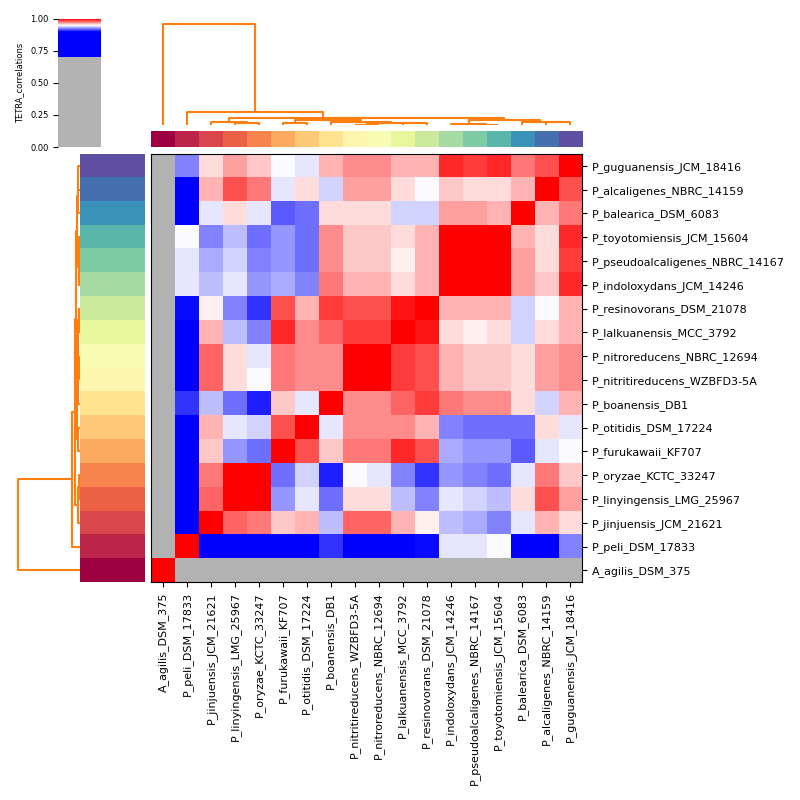

In [31]:
from IPython.display import Image

Image(filename='pyani/tetra_output/TETRA_correlations.png')

In [37]:
import pandas as pd

tetra_df = pd.read_table('pyani/tetra_output/TETRA_correlations.tab', header=0)

tetra_df_cmp = tetra_df.iloc[:, [0,4]]

tetra_df_cmp

tetra_df_cmp.to_csv("pyani/tetra_output/P_boanensis_v_references_tetra_correlations.csv")

#### Notes:

Saved TETRA correlations to csv file.